In [2]:
import pandas as pd

In [3]:
df=pd.read_csv(r"C:\Users\Yaksha\Desktop\machine_learning_project_setup\notebook\data\stud.csv")

In [4]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
import warnings
warnings.filterwarnings("ignore")

In [7]:
df.shape

(1000, 8)

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
math_score,1000.0,66.089,15.163080,0.0,57.00,66.0,77.0,100.0
reading_score,1000.0,69.169,14.600192,17.0,59.00,70.0,79.0,100.0
writing_score,1000.0,68.054,15.195657,10.0,57.75,69.0,79.0,100.0


In [9]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [10]:
df.duplicated().sum()

0

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [12]:
df["gender"].unique()

array(['female', 'male'], dtype=object)

In [13]:
df["gender"].value_counts()

gender
female    518
male      482
Name: count, dtype: int64

In [14]:
numeric_colums=[features for features in df.columns if df[features].dtype!="O"]
categorical_colums=[features for features in df.columns if df[features].dtype=="O"]


In [15]:
numeric_colums

['math_score', 'reading_score', 'writing_score']

In [16]:
df["Total_marks"]=df["math_score"] +df["reading_score"] +df["writing_score"]

In [17]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total_marks
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229


In [18]:
df["Average"]=df["Total_marks"]/3

In [19]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total_marks,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333


In [20]:
reading_score=df[df["reading_score"]==100]["Average"].count()

In [21]:
reading_score

17

In [22]:
writing_score=df[df["writing_score"]==100]["Average"].count()

In [23]:
writing_score

14

In [24]:
math_score=df[df["math_score"]==100]["Average"].count()

In [25]:
math_score

7

In [26]:
reading_20=df[df["reading_score"]<=20]["Average"].count()

In [27]:
reading_20

1

In [28]:
writing_score=df[df["writing_score"]<=20]["Average"].count()

In [29]:
writing_score

3

In [30]:
math_score=df[df["math_score"]<=20]["Average"].count()

In [31]:
math_score

4

In [32]:
# EDA


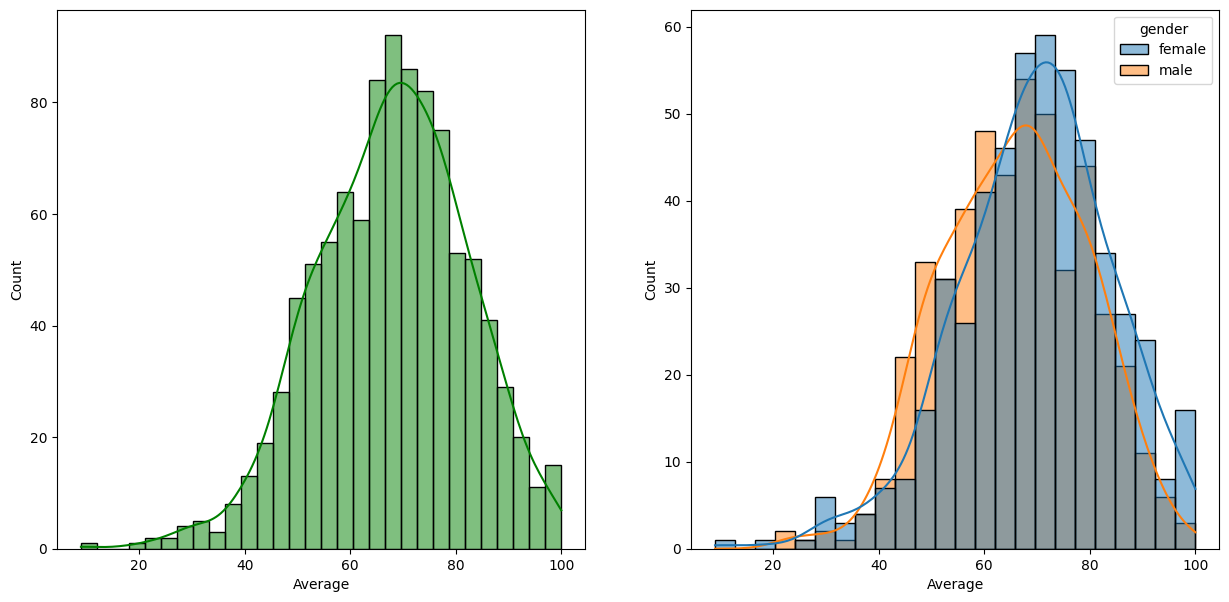

In [40]:
fig,axs=plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x="Average",bins=30,kde=True,color="g")
plt.subplot(122)
sns.histplot(data=df,x="Average",kde=True,hue="gender")
# plt.legend()
plt.show()

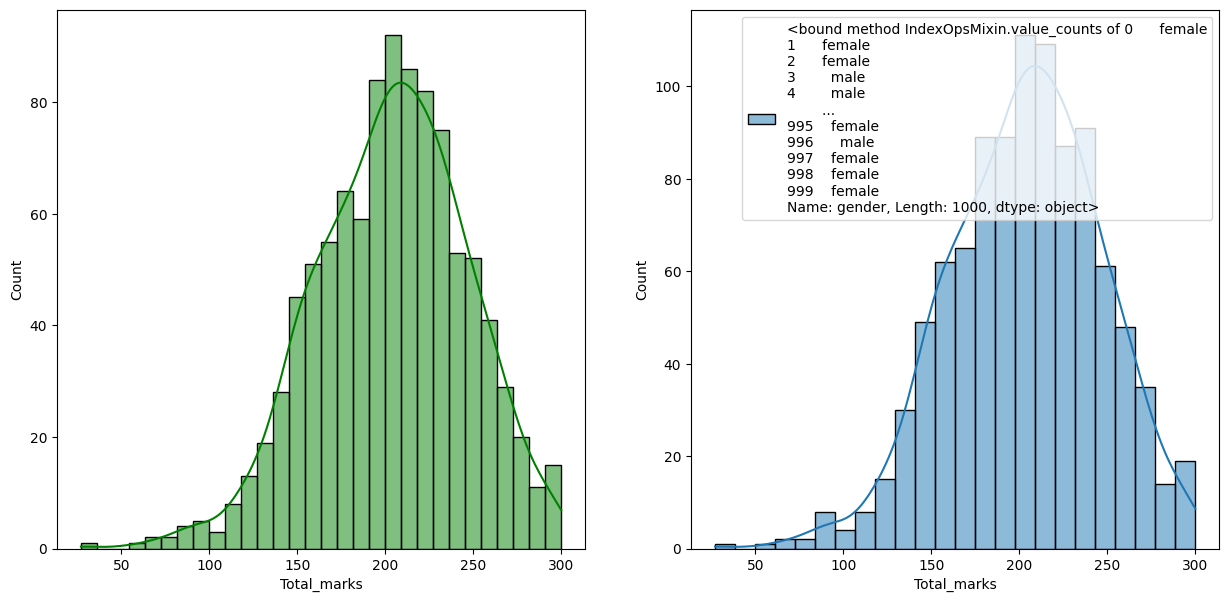

In [43]:
fig,axs=plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x="Total_marks",bins=30,kde=True,color="g")
plt.subplot(122)
sns.histplot(data=df,x="Total_marks",kde=True,hue=df["gender"].value_counts)
# plt.legend()
plt.show()